In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Let’s say we have a fictional dataset of pairs of variables, a mother and her daughter’s heights.
Create a CSV file for the above training data and write a Python function program to find the fitted linear
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the error, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother height
(X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughter’s height with
given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs (6x4=24
iterations).

In [2]:
def cost(y_hat,y):
    return np.sqrt(np.mean((y_hat-y)**2))

In [3]:
def linear(X,Y,epoch,alpha):
    b0=0
    b1=0
    costs=[]
    for iter in range(epoch):
        for i in range(len(X)):
            y_hat=b0+b1*X[i]
            costs.append(cost(y_hat,Y[i]))
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i]
    return b0,b1,costs

In [4]:
df=pd.read_csv('height.csv')
df

,mother_height,daughter_height
0,55,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [5]:
x=df['mother_height'].values
y=df['daughter_height'].values

In [6]:
epoch=4
alpha=0.0001
b0,b1,costs=linear(x,y,epoch,alpha)

In [7]:
y_pred=b0+b1*x
mae=rmse=np.mean(abs(y_pred-y))
mse=np.mean((y_pred-y)**2)
rmse=np.sqrt(np.mean((y_pred-y)**2))
print('mae',mae,'mse',mse,'rmse',rmse)

mae 2.983963441100402 mse 10.763065360860908 rmse 3.2807111059739635


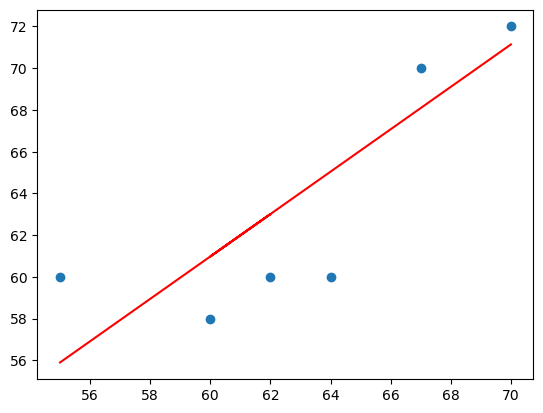

In [8]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')

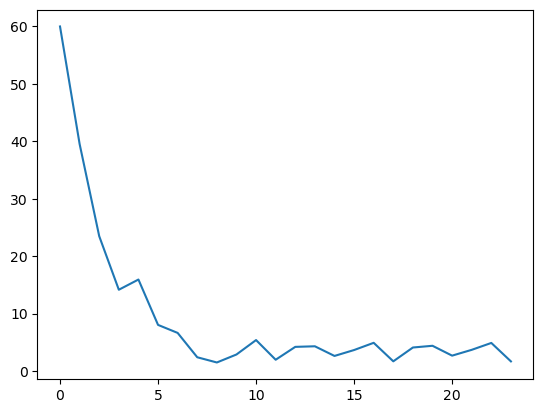

In [9]:
plt.plot(range(epoch*len(x)),costs)

## sklearn

In [10]:
from sklearn.linear_model import SGDRegressor

In [11]:
sgd=SGDRegressor(max_iter=4,eta0=0.0001)
sgd.fit(x.reshape(-1,1),y.reshape(-1,1))
b0=sgd.intercept_
b1=sgd.coef_

y_pred=b0+b1*x

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [12]:
mae=rmse=np.mean(abs(y_pred-y))
mse=np.mean((y_pred-y)**2)
rmse=np.sqrt(np.mean((y_pred-y)**2))
print('mae',mae,'mse',mse,'rmse',rmse)

mae 2.9933096924095737 mse 10.256440194516466 rmse 3.2025677501836656


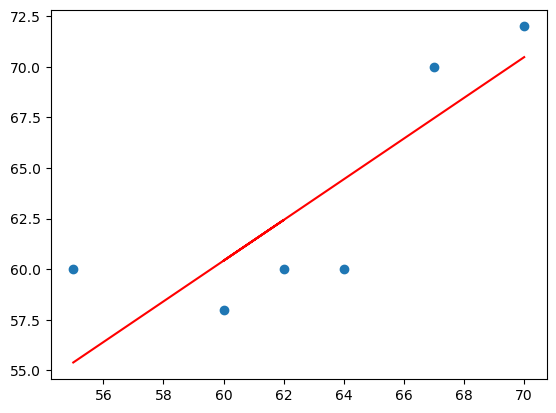

In [13]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')

2. Create a CSV file for the above training data and write a Python function program to find the fitted logistic
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis
and iteration in x-axis with 3 epochs (8x3=24 iterations).

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
def loss(y_hat,y):
    return (-1/len(y))*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

In [16]:
def logistic(X,Y,epoch,alpha):
    b0=0
    b1=0
    costs=[]
    for iter in range(epoch):
        y_pred=[]
        for i in range(len(X)):
            z=b0+b1*X[i]
            y_hat=sigmoid(z)
            y_pred.append(y_hat)
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i]
        cost=loss(np.array(y_pred),y)
        print(f'Cost at {iter+1}:',cost)
        costs.append(cost)
        
    return b0,b1,costs

In [17]:
df=pd.read_csv('pass.csv')
df

,Hours,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [18]:
x=df['Hours'].values
y=df['Pass'].values

In [19]:
epoch=4
alpha=0.005
b0,b1,costs=logistic(x,y,epoch,alpha)

Cost at 1: 0.6883454701255218
Cost at 2: 0.6589938220010261
Cost at 3: 0.6417198440255918
Cost at 4: 0.6312616460823844


In [20]:
y_pred=b0+b1*x

In [21]:
y_hot=(y_pred>=0.5).astype(int)
y_hot

array([0, 0, 0, 0, 1, 1, 1, 1])

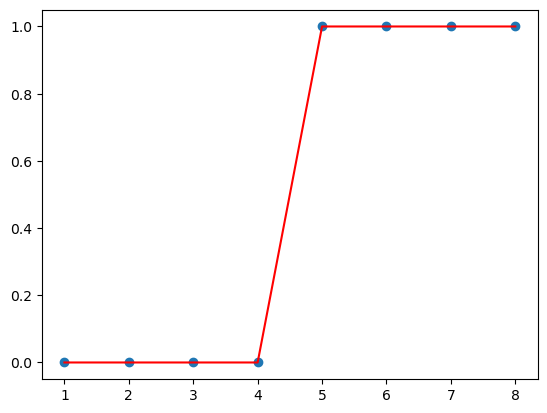

In [22]:
plt.scatter(x,y)
plt.plot(x,y_hot.T,color='r')

In [23]:
accuracy=np.mean(y_hot==y)*100
print(f'Accuracy = {accuracy} %')

Accuracy = 100.0 %


In [24]:
y1=b0+b1*3.5
y2=b0+b1*7.5
print(f'3.5 hours: {y1}\n7.5 hours: {y2}') 

3.5 hours: 0.39004566473305197
7.5 hours: 0.8446810431559029


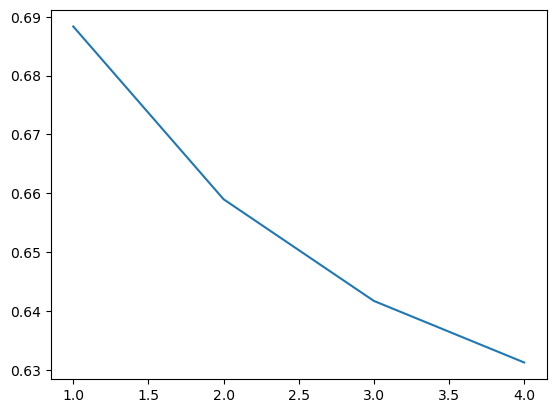

In [25]:
plt.plot(range(1,epoch+1),costs)

## sklearn

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
sgd=LogisticRegression()
sgd.fit(x.reshape(-1,1),y)
b0=sgd.intercept_
b1=sgd.coef_

y_pred=b0+b1*x

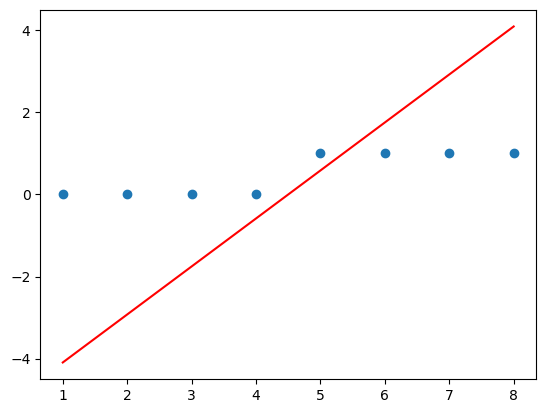

In [28]:
plt.scatter(x,y)
plt.plot(x,y_pred.T,color='r')